In [217]:
import math
from timeit import default_timer as timer
import matplotlib.pyplot as plt
from cramersche import *

In [197]:
matrix_size_det_test = 11 ## Matrixgröße (type), Matzrix wird aber für den Typ -1 generiert

### Funktion zum berechen des Typs der Matrix und checken ob es sich um eine quadratische Matrix handelt

### Plotten der Zeit in Abhängigkeit der Anzahl der Elemente für die Berechnung der Determinante

#### Generieung von Testdaten

In [198]:
def gen_test():
    data = []
    for i in range(1, matrix_size_det_test+1):
        matrix = generate_matrix(i, i)
        matrix = fill_matrix(matrix)
        start = timer()
        calc_determinant(matrix)
        end = timer()
        time = end - start
        data.append([i*i, time])
    return data

In [199]:
data = gen_test()
for i in range(10):
    new_data = gen_test()
    for j in range(len(data)):
        data[j][1] += new_data[j][1]
for i in range(len(data)):
    data[i][1] /= 11
print(data)
data_det = data

[[1, 7.459999654780735e-07], [4, 5.264552204277028e-07], [9, 3.7501820109107276e-06], [16, 1.5556998815472152e-05], [25, 7.784863489425995e-05], [36, 0.00046553772831843656], [49, 0.003292954635319554], [64, 0.025636624909979713], [81, 0.22426758309170094], [100, 2.2404519810013217], [121, 24.62606924627008]]


#### Plotten der Daten

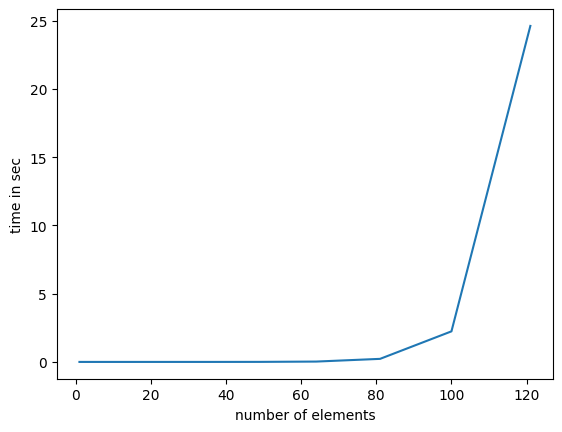

In [200]:
x = [data_det[i][0] for i in range(len(data_det))]
y = [data_det[i][1] for i in range(len(data_det))]

plt.plot(x, y)
plt.ylabel("time in sec")
plt.xlabel("number of elements")
plt.show()



    

### Simulierung Cramerisce Regel

#### Generierung von Testdaten

In [226]:
matrix = [[3,-1], [-1,3]]
loesung = [20,-20]
print(cramerische_regel(matrix, loesung))

0
0
[[20, -20], [-1, 3]]
1
1
[[3, -1], [20, -20]]
[5.0, -5.0]


In [202]:
def gen_test_matrix_mit_loesung(size):
    data = []
    for i in range(1, size+1):
        matrix = generate_matrix(i, i)
        matrix = fill_matrix(matrix)
        loesung = []
        for j in range(i):
            loesung.append(randint(0, 10))
        start = timer()
        result = cramerische_regel(matrix, loesung)
        end = timer()
        time = end - start
        data.append([i*i, time])
    return data, result

In [203]:
data, result = gen_test_matrix_mit_loesung(11)
for i in range(0):
    new_data, new_result = gen_test_matrix_mit_loesung(11)
    for j in range(len(data)):
        data[j][1] += new_data[j][1]
for i in range(len(data)):
    data[i][1] /= 1
data_cra = data

0
[[7]]
0
0
[[4, 7], [2, 6]]
1
1
[[8, 2], [4, 7]]
0
0
0
[[7, 4, 3], [7, 5, 5], [3, 10, 1]]
1
1
1
[[2, 8, 2], [7, 4, 3], [3, 10, 1]]
2
2
2
[[2, 8, 2], [7, 5, 5], [7, 4, 3]]
0
0
0
0
[[4, 2, 1, 7], [0, 9, 1, 7], [6, 2, 2, 10], [4, 6, 0, 6]]
1
1
1
1
[[7, 1, 8, 10], [4, 2, 1, 7], [6, 2, 2, 10], [4, 6, 0, 6]]
2
2
2
2
[[7, 1, 8, 10], [0, 9, 1, 7], [4, 2, 1, 7], [4, 6, 0, 6]]
3
3
3
3
[[7, 1, 8, 10], [0, 9, 1, 7], [6, 2, 2, 10], [4, 2, 1, 7]]
0
0
0
0
0
[[7, 1, 10, 7, 5], [0, 9, 0, 4, 0], [2, 7, 10, 8, 9], [10, 6, 6, 3, 1], [0, 10, 8, 10, 0]]
1
1
1
1
1
[[10, 0, 0, 1, 4], [7, 1, 10, 7, 5], [2, 7, 10, 8, 9], [10, 6, 6, 3, 1], [0, 10, 8, 10, 0]]
2
2
2
2
2
[[10, 0, 0, 1, 4], [0, 9, 0, 4, 0], [7, 1, 10, 7, 5], [10, 6, 6, 3, 1], [0, 10, 8, 10, 0]]
3
3
3
3
3
[[10, 0, 0, 1, 4], [0, 9, 0, 4, 0], [2, 7, 10, 8, 9], [7, 1, 10, 7, 5], [0, 10, 8, 10, 0]]
4
4
4
4
4
[[10, 0, 0, 1, 4], [0, 9, 0, 4, 0], [2, 7, 10, 8, 9], [10, 6, 6, 3, 1], [7, 1, 10, 7, 5]]
0
0
0
0
0
0
[[10, 5, 10, 5, 8, 5], [3, 2, 9, 9, 6, 6], [7

#### Plotten der Daten

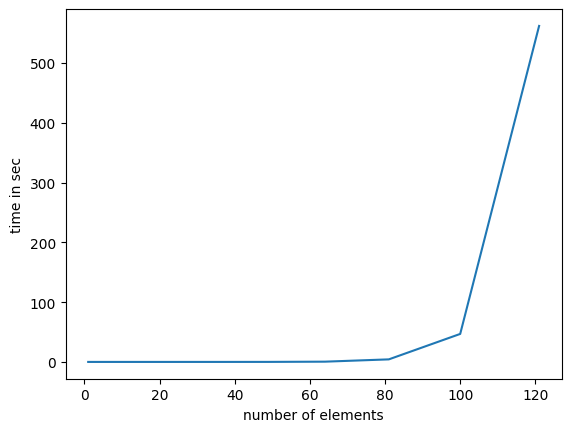

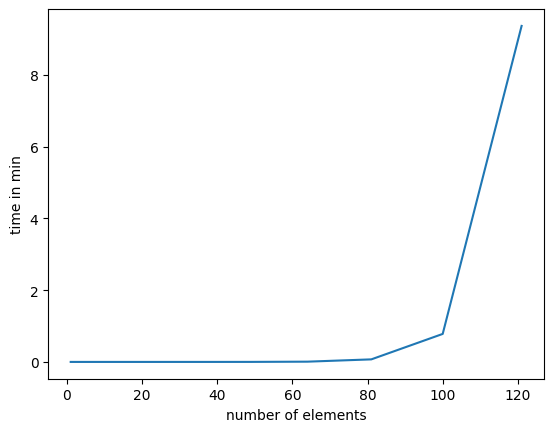

In [209]:
x_cra = [data_cra[i][0] for i in range(len(data_cra))]
y_cra = [data_cra[i][1] for i in range(len(data_cra))]
plt.plot(x_cra, y_cra)
plt.ylabel("time in sec")
plt.xlabel("number of elements")
plt.show()

y_cra = [data_cra[i][1] / 60 for i in range(len(data_cra))]
plt.plot(x_cra, y_cra)
plt.ylabel("time in min")
plt.xlabel("number of elements")
plt.show()



    

#### Vergleich zwischen Cramerisce Regel und Berechnung der Determinante

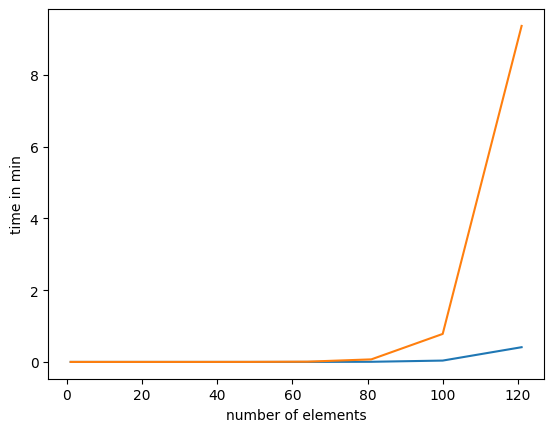

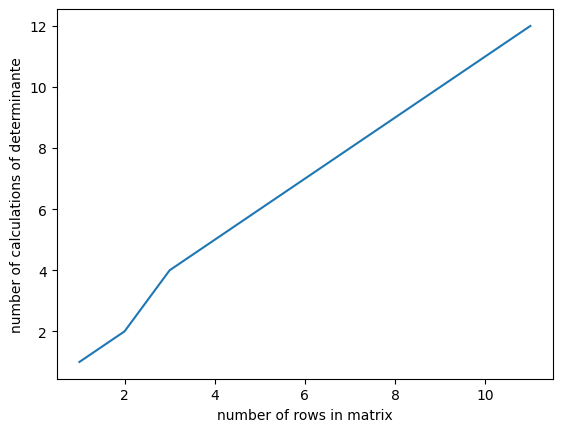

In [227]:
x_cra = [data_cra[i][0] for i in range(len(data_cra))]
y_cra = [data_cra[i][1] / 60 for i in range(len(data_cra))]
x_det = [data_det[i][0] for i in range(len(data_det))]
y_det = [data_det[i][1] / 60 for i in range(len(data_det))]
plt.plot(x_det, y_det)
plt.plot(x_cra, y_cra)
plt.ylabel("time in min")
plt.xlabel("number of elements")
plt.show()

x_count = [(math.sqrt(data_cra[i][0])) for i in range(len(data_cra))]
y_count = [(math.sqrt(data_cra[i][0])) for i in range(len(data_cra))]
for i in range(2, len(y_count)):
    y_count[i] += 1
plt.plot(x_count, y_count)
plt.ylabel("number of calculations of determinante")
plt.xlabel("number of rows in matrix")
plt.show()